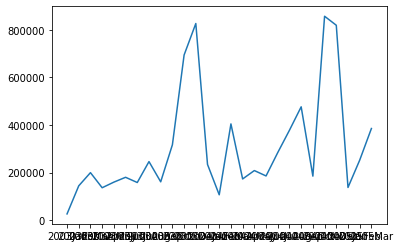

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import warnings
import statsmodels.api as sm
df = pd.read_csv('https://raw.githubusercontent.com/ggliang/ggliang/main/monthly%20revenue.csv')
df_test = df.loc[27:,]
df = df.loc[:26,]
plt.plot(df['Month'],df['revenue'])

df_1_diff = df['RemoveAVG'].diff(1).dropna()




In [4]:
import statsmodels.tsa.stattools as ts
import numpy as np
adf_summary = ts.adfuller(np.array(df_1_diff).reshape(-1)) # 进行ADF检验并打印结果
print(adf_summary)

(-3.063338519994728, 0.029387972821506826, 9, 16, {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}, 445.87819243389123)


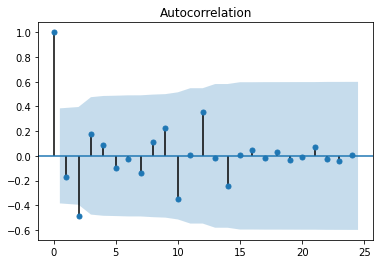

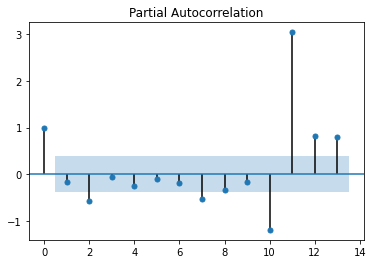

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 绘制自相关图
plot_acf(df_1_diff,lags=24).show() # 其中lags参数是指横坐标最大取值
# 绘制偏相关图
plot_pacf(df_1_diff,lags=13).show()
plt.show()

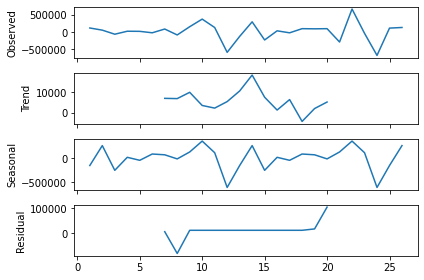

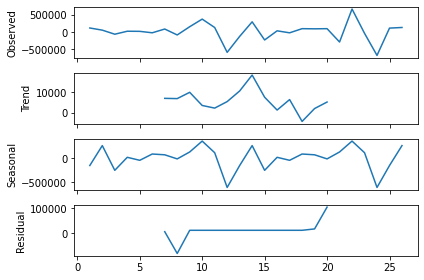

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_1_diff, freq=12)
trend = decomposition.trend   # 趋势部分
seasonal = decomposition.seasonal # 季节性部分
residual = decomposition.resid # 残留部分
decomposition.plot()


In [8]:
p = q = range(0, 2) 
d = range(1,2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['RemoveAVG'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:360.0783498136213
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:51.796475030342584
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:320.7017755105407
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:57.55908556838891
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:348.6070675047351
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:31.508236002615362
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:323.1597629703157
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:33.55087807293033


In [9]:

import numpy as np
mod = sm.tsa.statespace.SARIMAX(df['revenue'],order=(1,1,0),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
result = mod.fit()
predict_sunspots = result.forecast(9)
forcast = np.array(predict_sunspots[:]).reshape(-1)
forcast

array([253084.27406819, 271995.48926283, 273032.93346679, 316637.7551586 ,
       408879.52830727, 426671.15378195, 330907.84731049, 874109.98196885,
       910664.43311075])